In [315]:
import numpy as np

In [316]:
data = np.load('Intial_clip_test.npy')
labels = np.load("Labels.npy")
data
data.shape, labels.shape

((12008, 227, 67), (12008,))

In [317]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [318]:
labels

array(['L', 'R', 'L', ..., 'R', 'L', 'L'], dtype='<U8')

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
# X_train, X_test, y_train, y_test = train_test_split(data, y_encoded_repeated, test_size= .3, random_state = 42)

In [321]:
y_encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
X_train = np.load("TrainTestData/X_train_frontpad_0.npy")
y_train = np.load("TrainTestData/y_train_frontpad_0.npy")
X_val = np.load("TrainTestData/X_val_test_frontpad_0.npy")
y_val = np.load("TrainTestData/y_val_test_frontpad_0.npy")
X_test = np.load("TrainTestData/X_test.npy")
y_test = np.load("TrainTestData/y_test.npy")

In [563]:
X_train.shape, X_val.shape, X_test.shape,  y_train.shape, y_val.shape, y_test.shape

((1800, 227, 67), (79, 227, 67), (31, 227, 67), (1800,), (79,), (31,))

In [564]:
X_train = X_train[:,:,1:]
X_val = X_val[:,:,1:]
X_test = X_test[:,:,1:]

In [565]:
X_train.shape, X_val.shape, X_test.shape,  y_train.shape, y_val.shape, y_test.shape

((1800, 227, 66), (79, 227, 66), (31, 227, 66), (1800,), (79,), (31,))

In [560]:
X_train.shape

(1800, 227, 66)

In [325]:
y_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [566]:
from sklearn.preprocessing import StandardScaler

clips, frames, landmarks = X_train.shape
# Reshape to 2D for scaling: (clips * frames, landmark features)
X_train_reshaped = X_train.reshape(-1, landmarks)

# Fit and scale using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Reshape back to original 3D shape
X_train_scaled = X_train_scaled.reshape(clips, frames, landmarks)

X_val_reshaped = X_val.reshape(-1, landmarks)
X_val_scaled = scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

# Scale test data using the same scaler
X_test_reshaped = X_test.reshape(-1, landmarks)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

In [329]:
X_train_scaled.shape, y_train.shape

((5411, 227, 67), (5411,))

In [335]:
n_samples, n_timesteps, n_features = X_train_scaled.shape


In [342]:
X_train_scaled[0].shape

(227, 67)

In [341]:
X_train_scaled.reshape(n_samples, n_timesteps*n_features)[0].shape

(15209,)

In [567]:
from imblearn.over_sampling import SMOTE
from collections import Counter
n_samples, n_timesteps, n_features = X_train_scaled.shape
X_flat = X_train_scaled.reshape(n_samples, n_timesteps * n_features)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_flat, y_resampled = smote.fit_resample(X_flat, y_train)

# Step 3: Reshape the data back to original format
X_resampled = X_resampled_flat.reshape(-1, n_timesteps, n_features)

# Check new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Optional: Verify shapes
print(f"Original X shape: {X_train.shape}, Resampled X shape: {X_resampled.shape}")
print(f"Original y shape: {y_train.shape}, Resampled y shape: {y_resampled.shape}")

Resampled class distribution: Counter({'L': 800, 'R': 800, 'C': 800})
Original X shape: (1800, 227, 66), Resampled X shape: (2400, 227, 66)
Original y shape: (1800,), Resampled y shape: (2400,)


In [568]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_resampled)

y_train_encoded = to_categorical(encoded_labels, num_classes=3)
y__train_encoded_repeated = np.repeat(y_train_encoded[:, np.newaxis, :], 227, axis=1)  # Shape (samples, 219, 3)
y_val_encoded = to_categorical(label_encoder.fit_transform(y_val), num_classes=3)
y__val_encoded_repeated = np.repeat(y_val_encoded[:, np.newaxis, :], 227, axis=1)
y_test_encoded = to_categorical(label_encoder.fit_transform(y_test), num_classes=3)
y__test_encoded_repeated = np.repeat(y_test_encoded[:, np.newaxis, :], 227, axis=1)


In [ ]:
X_train_scaled.shape, y__train_encoded_repeated.shape, X_train.shape

((5411, 227, 67), (5411, 227, 3), (5411, 227, 67))

In [ ]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow_addons.losses import SigmoidFocalCrossEntropy
model = Sequential()

# Add LSTM layer
model.add(LSTM(units = 64, input_shape=(X_resampled.shape[1], X_resampled.shape[2]), activation='tanh', kernel_regularizer=l2(0.01), return_sequences=True))

# Dropout to avoid overfitting #SoftSign
model.add(BatchNormalization())
model.add(Dropout(0.8))
# # Add another LSTM layer (optional)
model.add(LSTM(32, activation='tanh', kernel_regularizer=l2(0.01) ,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.8))
# model.add(LSTM(32, activation='tanh', kernel_regularizer=l2(0.01) ,return_sequences=True))
# model.add(Dropout(0.8))
# model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())
# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(BatchNormalization())

# Add Dense layer for classification at each time step
model.add(Dense(3, activation='sigmoid'))

# Compile the model
# loss_fn = SigmoidFocalCrossEntropy()
# model.compile(optimizer= tf.keras.optimizers.Adam(clipvalue = 1.0), loss=loss_fn, metrics=['accuracy']) clipvalue = 1.0
model.compile(optimizer= tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath="models/Cat3_frontpad_0_2model_epoch_{epoch:02d}.keras", 
                              monitor='val_loss',  # Metric to monitor
                              save_best_only=False,  # Save only the best weights
                              verbose=1)

# Summary of the model
model.summary()

# Fit the model
history = model.fit(X_resampled, y__train_encoded_repeated, epochs=20,callbacks=[checkpoint], validation_data = (X_val_scaled, y__val_encoded_repeated), batch_size=64)

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_135 (LSTM)                 │ (None, 227, 64)        │        33,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 227, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 227, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_136 (LSTM)                 │ (None, 227, 32)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 227, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 227, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 227, 3)         │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,435 (181.39 KB)

 Trainable params: 46,243 (180.64 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.3370 - loss: 4.0806
Epoch 1: saving model to models/Cat3_frontpad_0model_epoch_01.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.3370 - loss: 4.0729 - val_accuracy: 0.3823 - val_loss: 2.3759
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.3442 - loss: 3.0096
Epoch 2: saving model to models/Cat3_frontpad_0model_epoch_02.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.3442 - loss: 3.0052 - val_accuracy: 0.4108 - val_loss: 1.9722
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.3459 - loss: 2.3845
Epoch 3: saving model to models/Cat3_frontpad_0model_epoch_03.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.3459 - loss: 2.3818 - val_accuracy: 0.3925 - val_loss: 1.7009
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.3513 - loss: 1.9702
Epoch 4: saving model to models/Cat3_frontpad_0model_epoch_04.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 17

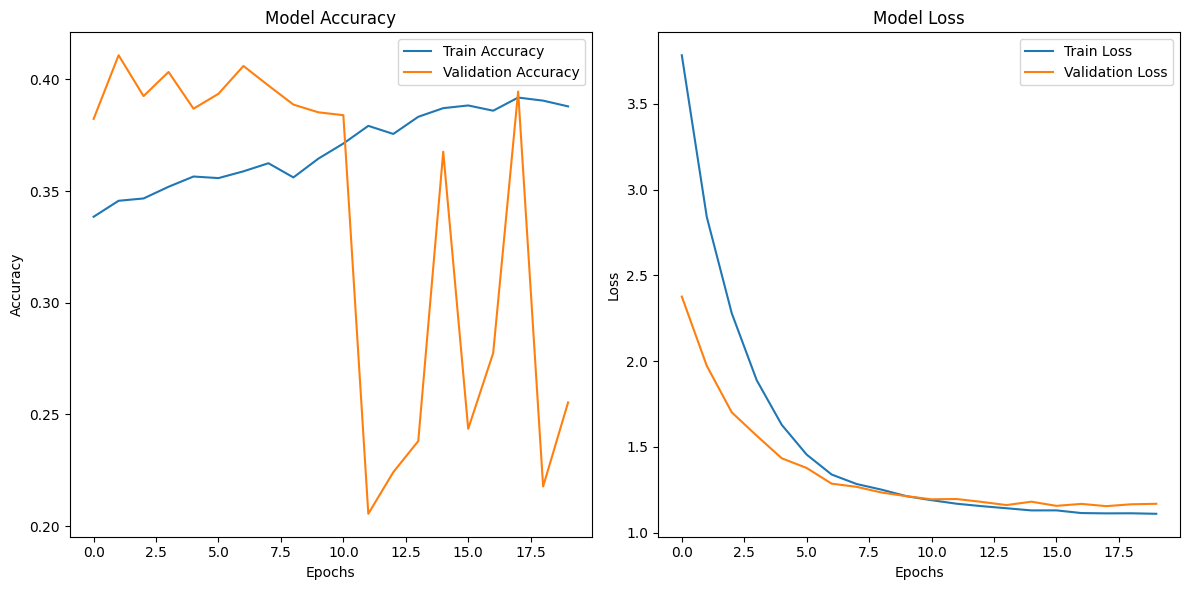

In [574]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

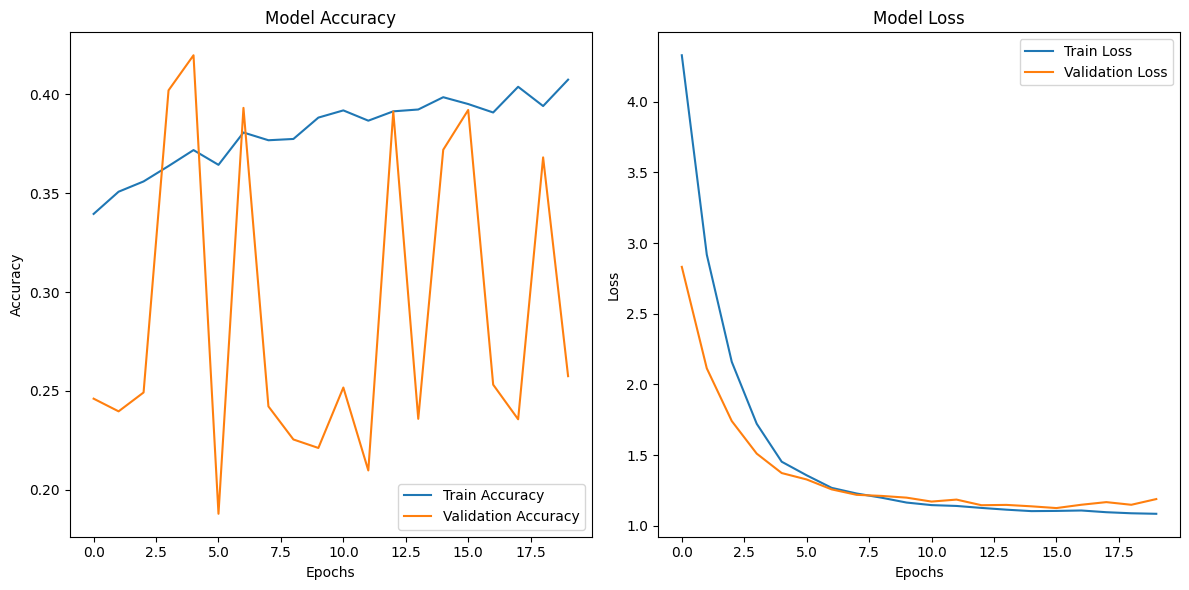

In [572]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [422]:
np.argmin(np.array(history.history['val_loss']))

31

In [344]:
unique, counts = np.unique(y_resampled, return_counts=True)
result = dict(zip(unique, counts))

print(result)

{'C': 2359, 'L': 2359, 'R': 2359}


In [487]:
from tensorflow.keras.models import load_model

In [488]:
top_model = load_model('models/Cat3model_epoch_31.keras')

In [504]:
y_pred = top_model.predict(X_test_scaled)[::-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [505]:
y_pred[:,-1].shape

(31, 3)

In [506]:
arr = y_pred[:,-1]

# Create a new array with the same shape as arr, filled with zeros
result = np.zeros_like(arr)

# Find the indices of the maximum values in each row
max_indices = np.argmax(arr, axis=1)

# Replace the maximum values with 1
rows = np.arange(arr.shape[0])  # Row indices
result[rows, max_indices] = 1

# Print the resulting array
result

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [507]:
indices_y_pred = np.argmax(result, axis=1)
indices_y_test = np.argmax(y_test_encoded, axis=1)

indices_y_pred, indices_y_test

(array([0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2,
        1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64),
 array([0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
        0, 2, 1, 2, 1, 2, 0, 0, 1], dtype=int64))

In [508]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(indices_y_test,indices_y_pred)

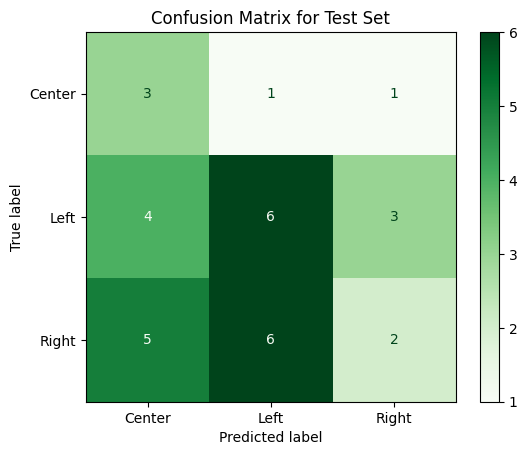

In [510]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label_cm = ["Center", "Left", "Right"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_cm)
disp.plot(cmap=plt.cm.Greens)  # Change colormap to Greens
plt.title("Confusion Matrix for Test Set")  # Add a title
plt.show()

In [399]:
result.shape

(31, 3)

In [429]:
y_test_encoded.shape

(31, 3)

In [435]:
y_test[0]

'C'

In [442]:
X_test[0].shape

(227, 67)

In [539]:
X_test[1,:,:]

array([[ 0.00000000e+00,  1.53042600e-01,  1.80951744e-01, ...,
         6.85032234e-02, -3.25479507e-02,  5.59917763e-02],
       [ 1.00000000e+00,  1.52584821e-01,  1.79620638e-01, ...,
         2.85881646e-02,  2.42099195e-04,  5.98537503e-03],
       [ 2.00000000e+00,  1.73295885e-01,  1.56696409e-01, ...,
         4.55076210e-02,  9.64926439e-04,  1.48597015e-02],
       ...,
       [ 1.38000000e+02,  3.61293823e-01,  4.01024967e-01, ...,
        -1.73445623e-02, -5.86009659e-02, -3.99117433e-02],
       [ 1.38000000e+02,  3.61293823e-01,  4.01024967e-01, ...,
        -1.73445623e-02, -5.86009659e-02, -3.99117433e-02],
       [ 1.38000000e+02,  3.61293823e-01,  4.01024967e-01, ...,
        -1.73445623e-02, -5.86009659e-02, -3.99117433e-02]])

In [554]:
y_test[1]

'R'

In [550]:
temp_view = X_test[1]
temp_view[:,0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 138., 138., 138., 138.,
       138., 138., 138., 138., 138., 138., 138., 13

In [551]:
import pandas as pd
df = pd.DataFrame(np.column_stack((temp_view[:,0], y_pred[1])), columns=['Frame', 'CenterPred', 'LeftPred', 'RightPred'])

In [552]:
pd.set_option('display.max_rows', None)
df

,Frame,CenterPred,LeftPred,RightPred
0,0.0,0.539849,0.575748,0.553792
1,1.0,0.533745,0.558207,0.534326
2,2.0,0.532495,0.553723,0.527137
3,3.0,0.529810,0.554532,0.524601
4,4.0,0.523558,0.555600,0.522226
5,5.0,0.514394,0.555217,0.518736
6,6.0,0.504273,0.553818,0.514760
7,7.0,0.494691,0.552093,0.511030
8,8.0,0.486301,0.550545,0.507973
9,9.0,0.479108,0.549322,0.505622


In [523]:
np.column_stack((temp_view[:,0], y_pred[0]))

array([[ 0.        ,  0.5402348 ,  0.57995325,  0.55875045],
       [ 1.        ,  0.53013676,  0.55569196,  0.53418654],
       [ 2.        ,  0.52672231,  0.53725761,  0.51613867],
       [ 3.        ,  0.52841467,  0.52463192,  0.50429899],
       [ 4.        ,  0.53285491,  0.51616168,  0.49665672],
       [ 5.        ,  0.53897238,  0.51121926,  0.49244559],
       [ 6.        ,  0.54568923,  0.50877333,  0.490637  ],
       [ 7.        ,  0.55228347,  0.50804281,  0.49044681],
       [ 8.        ,  0.5582093 ,  0.50822008,  0.49109226],
       [ 9.        ,  0.56329864,  0.50884813,  0.49213493],
       [10.        ,  0.567433  ,  0.50935626,  0.49307129],
       [11.        ,  0.57093477,  0.50988328,  0.49403152],
       [12.        ,  0.57392174,  0.51037014,  0.49496219],
       [13.        ,  0.57656342,  0.51090044,  0.4959296 ],
       [14.        ,  0.57885718,  0.51135164,  0.49681407],
       [15.        ,  0.58089584,  0.51176298,  0.4976424 ],
       [16.        ,  0.

In [522]:
y_pred[0].shape

(227, 3)

In [477]:
indices = np.array([93, 138, 75, 113, 127, 107, 74, 71, 99, 100, 31, 113, 115, 44, 58, 123, 160, 51, 53, 71, 73, 55, 109, 36, 91, 106, 83, 117, 81, 125, 132], dtype=int)

In [474]:
result_array = np.zeros((31,3))
result_array

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [479]:
result_array = np.zeros((31,3))

for i in range(31):
    preds = y_pred[i]
    index = indices[i]
    result_array[i] = preds[index]

print(result_array)

[[0.62405127 0.46837616 0.46676108]
 [0.45346969 0.4827354  0.46692458]
 [0.6132136  0.43752983 0.44762152]
 [0.46546564 0.43169463 0.4535805 ]
 [0.59287864 0.53782809 0.52094418]
 [0.42698923 0.59874994 0.55149531]
 [0.43288428 0.39218187 0.41935813]
 [0.49858654 0.60377836 0.62612534]
 [0.63644862 0.45868096 0.45643118]
 [0.56221497 0.77333617 0.73779714]
 [0.42207018 0.41943067 0.4463819 ]
 [0.52377087 0.6495167  0.6786896 ]
 [0.46227413 0.35045686 0.37379101]
 [0.44331357 0.39468026 0.42527255]
 [0.45747414 0.54949278 0.50459599]
 [0.5289278  0.75499266 0.71839756]
 [0.66521847 0.86498195 0.85272646]
 [0.46648428 0.51091504 0.52961534]
 [0.44953328 0.46751055 0.4949823 ]
 [0.44616926 0.63701314 0.5917182 ]
 [0.41558635 0.58468205 0.53641111]
 [0.63402325 0.4557265  0.45585838]
 [0.4596929  0.66212469 0.61753905]
 [0.63198519 0.42135721 0.42702624]
 [0.44822663 0.37359977 0.39989072]
 [0.69301885 0.84919608 0.83651984]
 [0.62785989 0.85373837 0.83781475]
 [0.43742254 0.62787193 0.58

In [ ]:

for i in range(31):
    preds = y_pred[i]
    index = indices[i]
    print(preds[index])

[0.53013676 0.55569196 0.53418654]
[0.5337453  0.5582071  0.53432643]
[0.5420909  0.57354784 0.5539571 ]
[0.5221847  0.5661213  0.54628444]
[0.52148414 0.5557287  0.55210173]
[0.53459436 0.5704828  0.5533294 ]
[0.51613814 0.5283721  0.5207275 ]
[0.49688783 0.47721103 0.47880504]
[0.52961034 0.5488094  0.5299921 ]
[0.53210354 0.55692476 0.5418285 ]
[0.5371291  0.57791984 0.5615365 ]
[0.5366516  0.5719235  0.55533177]
[0.5270362  0.54664075 0.5387563 ]
[0.5266099  0.54344106 0.5354642 ]
[0.5303638 0.5552302 0.5349954]
[0.5332781  0.55769724 0.52987057]
[0.5206891  0.54889566 0.5232087 ]
[0.5002634  0.49232733 0.49424678]
[0.5237053  0.54902637 0.53993696]
[0.519075  0.5678284 0.5390259]
[0.5146698 0.5271403 0.5192232]
[0.53266644 0.5475122  0.5304242 ]
[0.52648085 0.57230884 0.54573524]
[0.52206963 0.50888216 0.50373757]
[0.52567625 0.5505913  0.5415738 ]
[0.52475315 0.5361004  0.51808083]
[0.53058904 0.5658232  0.55031896]
[0.519643   0.55107087 0.52706593]
[0.5382023  0.58185494 0.5614

In [458]:
result_pred = np.array([y_pred[i][indices] for i in range(31)])

In [462]:
result_pred.shape

(31, 6004, 3)

In [450]:
y_pred.shape

(31, 227, 3)

In [481]:
test_loss, test_acc = top_model.evaluate(X_test_scaled, y__test_encoded_repeated)
test_loss, test_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3926 - loss: 1.1311


(1.1311320066452026, 0.3926389217376709)

In [311]:
unique, counts = np.unique(y_train, return_counts=True)
result = dict(zip(unique, counts))

print(result)

{'C': 771, 'L': 2359, 'R': 2281}


In [278]:
import numpy as np

# Example class counts
class_counts = np.array([5, 13, 13])  # Replace with actual class counts
total_samples = class_counts.sum()

# Compute class proportions
class_proportions = class_counts / total_samples

# Calculate average accuracy
average_accuracy = np.sum(class_proportions**2)

print(f"Class proportions: {class_proportions}")
print(f"Average accuracy of a random predictor: {average_accuracy:.4f}")


Class proportions: [0.16129032 0.41935484 0.41935484]
Average accuracy of a random predictor: 0.3777


In [285]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Define class proportions and generate synthetic data
np.random.seed(29)  # For reproducibility

# Class counts (unbalanced classes)
class_counts = [5, 13, 13]  # Replace with actual counts
total_samples = sum(class_counts)
class_labels = [0, 1, 2]

# Generate true labels based on class proportions
true_labels = np.hstack([[label] * count for label, count in zip(class_labels, class_counts)])
np.random.shuffle(true_labels)

# Step 2: Generate random predictions based on class probabilities
class_proportions = np.array(class_counts) / total_samples

# Simulate random predictions
random_predictions = np.random.choice(
    class_labels, size=total_samples, p=class_proportions
)

# Step 3: Calculate accuracy
accuracy = accuracy_score(true_labels, random_predictions)
print(f"Empirical accuracy of the random predictor: {accuracy:.4f}")

# Step 4: Calculate theoretical average accuracy
theoretical_accuracy = np.sum(class_proportions**2)
print(f"Theoretical average accuracy: {theoretical_accuracy:.4f}")


Empirical accuracy of the random predictor: 0.2903
Theoretical average accuracy: 0.3777


In [276]:
np.product(counts/len(y_val))

0.02686243356386162

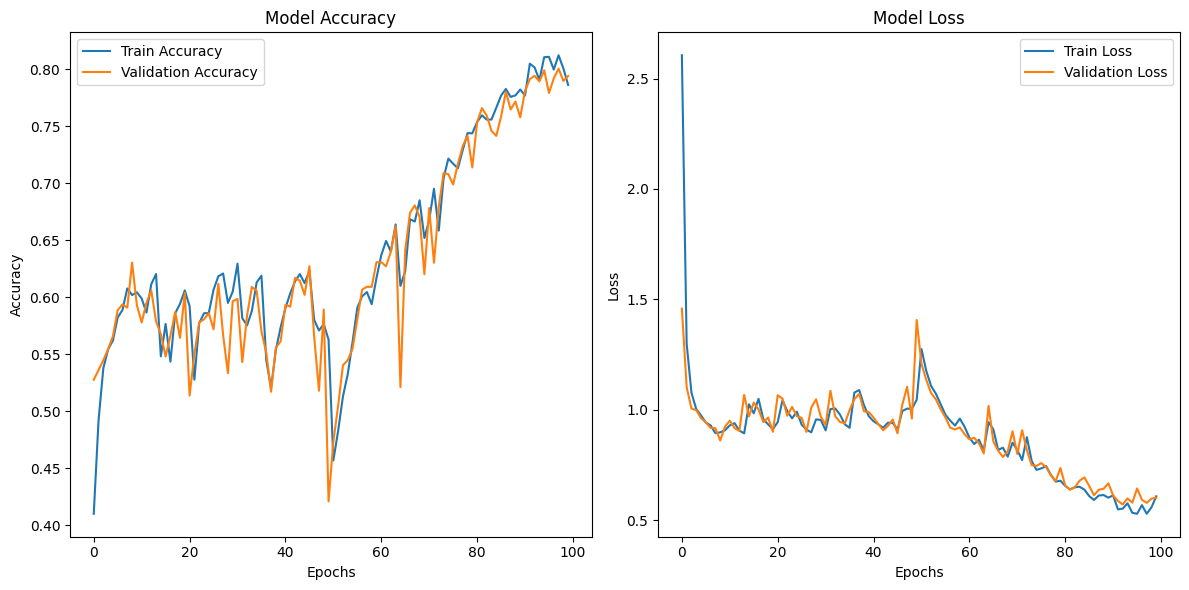

In [136]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
np.array([data[0]]).shape

(1, 219, 67)

In [140]:
label_encoder.transform(np.array([labels[0]]))

array([1])

In [299]:
y_pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [301]:
y_pred.shape

(31, 227, 3)

In [156]:
y_pred[:,-1]

array([[0.21080802, 0.7191456 , 0.5950274 ],
       [0.01444075, 0.9919905 , 0.10848094],
       [0.8416812 , 0.28416497, 0.5215326 ],
       ...,
       [0.3071882 , 0.1873813 , 0.98200154],
       [0.05081065, 0.2561307 , 0.9977978 ],
       [0.96895623, 0.0820166 , 0.61298656]], dtype=float32)

In [168]:
y_test[:,-1]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [302]:
arr = y_pred[:,-1]

# Create a new array with the same shape as arr, filled with zeros
result = np.zeros_like(arr)

# Find the indices of the maximum values in each row
max_indices = np.argmax(arr, axis=1)

# Replace the maximum values with 1
rows = np.arange(arr.shape[0])  # Row indices
result[rows, max_indices] = 1

# Print the resulting array
print(result)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [304]:
indices_y_pred = np.argmax(result, axis=1)
indices_y_test = np.argmax(y_test_encoded, axis=1)

indices_y_pred.shape, indices_y_test.shape

((31,), (31,))

In [408]:
test_loss, test_acc = model.evaluate(X_test_scaled, y__test_encoded_repeated)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3369 - loss: 1.2795


In [409]:
test_loss, test_acc

(1.2795058488845825, 0.33693331480026245)

In [406]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(indices_y_test,indices_y_pred)

array([[0, 2, 3],
       [0, 4, 9],
       [0, 5, 8]], dtype=int64)

In [307]:
y_test

array(['C', 'R', 'R', 'L', 'R', 'R', 'C', 'R', 'R', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'C', 'R', 'L', 'R',
       'L', 'R', 'C', 'C', 'L'], dtype='<U8')

In [308]:
y_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [306]:
12/31


0.3870967741935484

In [305]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(indices_y_test,indices_y_pred)

array([[0, 3, 2],
       [2, 6, 5],
       [0, 7, 6]], dtype=int64)

In [ ]:
misclassified_indices = np.where(~np.all(result == y_test[:,-1], axis=1))[0]

# Print misclassified examples
print("Misclassified indices:", len(misclassified_indices)/6002)
print("y_pred for misclassified samples:", y_pred[misclassified_indices])
print("y_test for misclassified samples:", y_test[misclassified_indices])

Misclassified indices: 0.10679773408863712
y_pred for misclassified samples: [[[0.32070208 0.60773194 0.6183162 ]
  [0.33183488 0.5948708  0.6165115 ]
  [0.34734902 0.57986206 0.61288637]
  ...
  [0.8420839  0.283627   0.52188706]
  [0.8418829  0.28389633 0.52170914]
  [1.         0.28416497 0.5215326 ]]

 [[0.3176614  0.60481244 0.62049055]
  [0.32009396 0.5891276  0.62767446]
  [0.3193242  0.5742134  0.64047456]
  ...
  [0.9266752  0.18500574 0.51314455]
  [0.9266918  0.18507648 0.5127518 ]
  [1.         0.18514608 0.5123615 ]]

 [[0.3135933  0.60994226 0.619167  ]
  [0.3094316  0.6032766  0.62120783]
  [0.3044201  0.5973509  0.6242488 ]
  ...
  [0.7672848  0.09902778 0.9110407 ]
  [0.76722765 0.09912506 0.9109116 ]
  [0.76716924 0.0992225  1.        ]]

 ...

 [[0.3191125  0.60548615 0.62043387]
  [0.31863788 0.5939966  0.6290493 ]
  [0.31148145 0.58631635 0.6422376 ]
  ...
  [0.19691382 0.91679865 0.11659962]
  [0.19659954 0.9171566  0.11609162]
  [0.19628605 1.         0.11559211]

In [208]:
testing_data = np.load('FullTestset.npy')
testing_labels = np.load("LabelsTestSet.npy")

In [210]:
testing_data.shape

(18, 227, 67)

In [211]:
testing_data_reshaped = testing_data.reshape(-1, landmarks)
testing_data_scaled = scaler.transform(testing_data_reshaped)
testing_data_scaled = testing_data_scaled.reshape(testing_data.shape)

In [ ]:
testing_data_scaled

(18, 227, 67)

In [215]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
encoded_labels_testing = label_encoder.fit_transform(testing_labels)

y_encoded_testing = to_categorical(encoded_labels_testing, num_classes=3)
y_encoded_testing.shape

(18, 3)

In [216]:
y_encoded_repeated_repeated = np.repeat(y_encoded_testing[:, np.newaxis, :], 227, axis=1)  # Shape (samples, 219, 3)
y_encoded_repeated_repeated.shape

(18, 227, 3)

In [222]:
y_pred_testing = model.predict(testing_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [224]:
y_encoded_repeated_repeated[:,-1]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [225]:
arr = y_pred_testing[:,-1]

# Create a new array with the same shape as arr, filled with zeros
result = np.zeros_like(arr)

# Find the indices of the maximum values in each row
max_indices = np.argmax(arr, axis=1)

# Replace the maximum values with 1
rows = np.arange(arr.shape[0])  # Row indices
result[rows, max_indices] = 1

# Print the resulting array
print(result)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [230]:
indices_y_pred_test = np.argmax(result, axis=1)
indices_y_test_test = np.argmax(y_encoded_repeated_repeated[:,-1], axis=1)

indices_y_pred, indices_y_test

(array([1, 1, 0, ..., 2, 2, 0], dtype=int64),
 array([1, 1, 2, ..., 2, 2, 0], dtype=int64))

In [232]:
np.where(indices_y_pred_test!=indices_y_test_test)

(array([ 0,  1,  2,  3,  5,  6,  7, 10, 13, 14, 15, 16, 17], dtype=int64),)